In [1]:
import os
# Dataset location
# Adjust to point to root of dataset
dataset_root = "X:\hirise-map-proj"

In [2]:
# Dataset: 10.5281/zenodo.1048301
from marsvision.utilities import DataUtility
data_loader = DataUtility(os.path.join(dataset_root, "map-proj"))

In [3]:
import pandas as pd

# Apply the SKLearn pipeline--
# Load data, extract features, train a model.
data_loader = DataUtility(os.path.join(dataset_root, "map-proj"))
data_loader.data_reader()
data_loader.data_transformer() 
# The extracted features we're training on should be in data_loader.df
data_df = data_loader.df

# Shaping dataframe to contain features and class codes
lines = pd.read_csv(os.path.join(dataset_root, "labels-map-proj.txt"), 
                    delimiter=" ",  
                    header = None,
                   names=["file_name", "class_code"])
lines = lines.sort_values(by="file_name")

df_labelled = lines.join(data_df.set_index("file_name"), 
                         on="file_name",
                         lsuffix="_left",
                         rsuffix="_right")
df_labelled = df_labelled.drop(labels=["class_code_right", "class"], axis=1)
df_labelled = df_labelled.rename(columns={
    "file_name" : "file_name", 
    "class_code_left" : "class_code"})



In [14]:
df_labelled

,file_name,class_code,0,1,2,3,4,5,img_data
873,ESP_011283_2265_RED-0032.jpg,0,84.706379,14424.955996,0.002600,403.657701,102.938210,1758.408455,"[[[100, 100, 100], [93, 93, 93], [82, 82, 82],..."
465,ESP_011289_1950_RED-0006.jpg,6,3.266122,822.193554,-0.001553,45.913871,78.866910,5354.609701,"[[[149, 149, 149], [150, 150, 150], [151, 151,..."
1815,ESP_011289_1950_RED-0007.jpg,6,5.141668,1284.688541,-0.001397,57.873429,60.246386,4771.687281,"[[[147, 147, 147], [147, 147, 147], [146, 146,..."
584,ESP_011289_1950_RED-0009.jpg,6,2.192261,554.220464,-0.000272,49.464534,75.727784,5847.890326,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1397,ESP_011289_1950_RED-0013.jpg,6,2.810844,708.864470,0.001979,112.121442,77.699237,5529.686793,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...,...,...
1377,TRA_000828_1805_RED-0148.jpg,6,15.058802,3613.226956,0.000252,52.019892,71.678802,5660.806630,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
513,TRA_000828_1805_RED-0149.jpg,6,11.644220,2833.688185,-0.002193,43.480424,85.822217,5167.247265,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2478,TRA_000828_1805_RED-0152.jpg,0,12.139087,2948.109689,-0.001669,16.581029,112.054319,1032.092588,"[[[126, 126, 126], [129, 129, 129], [134, 134,..."
1577,TRA_000828_1805_RED-0154.jpg,0,12.272701,2978.919521,-0.007510,35.245009,82.779309,4322.291647,"[[[142, 142, 142], [144, 144, 144], [146, 146,..."


## Cross Validation - Multi Class Classification With Random Forest

The classes in the Deep Mars dataset are as follows:

0: Other

1: Crater

2: Dark Dune

3: Streak

4: Bright Dune

5: Impact

6: Edge

In [20]:
from sklearn.ensemble import RandomForestClassifier
from marsvision.pipeline import Model
random_forest = RandomForestClassifier(n_estimators = 500)
x = df_labelled["img_data"]
y = df_labelled["class_code"]
random_forest = RandomForestClassifier(n_estimators = 500)
model = Model(random_forest, "sklearn", 
              training_images = x,
              training_labels = y)

In [21]:
model.cross_validate(5, "accuracy")

## Cross Validation Results - Per-Class Binary Classification
### "Other" Class

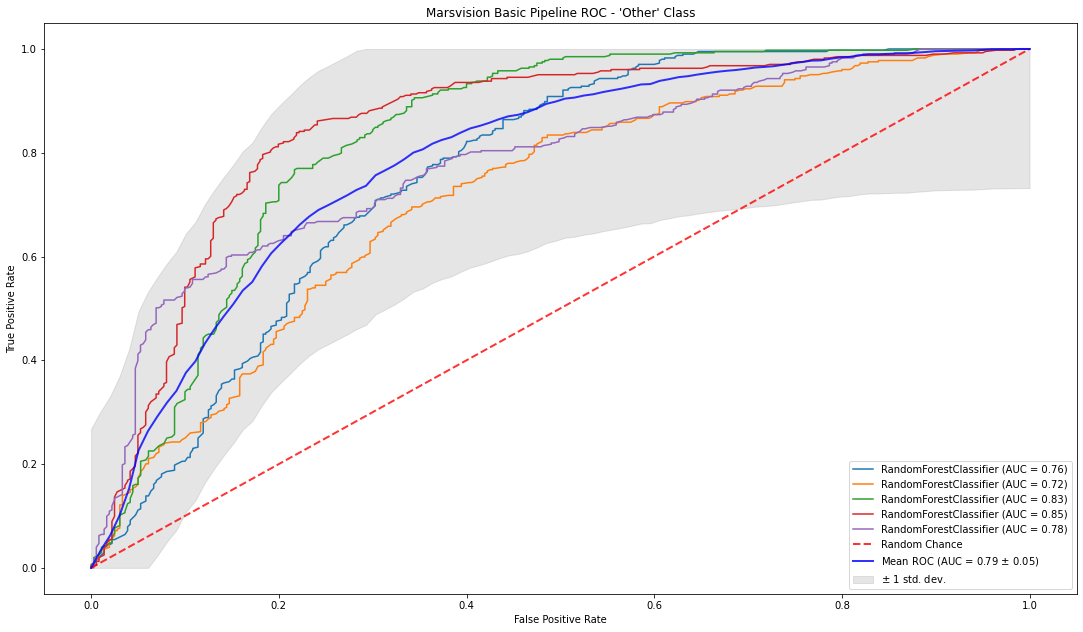

In [55]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 0 else 0)
other_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Other' Class")

In [56]:
other_cv_results

{'precisions': [0.7050691244239631,
  0.6811926605504587,
  0.7399193548387096,
  0.7895927601809954,
  0.6995515695067265],
 'recalls': [0.7574257425742574,
  0.7351485148514851,
  0.9084158415841584,
  0.8660049627791563,
  0.7741935483870968],
 'roc_aucs': [0.7618949394939494,
  0.7179455445544554,
  0.8314322057205722,
  0.8517111964971853,
  0.7833492573015404],
 'mean_auc': 0.7892666287135406,
 'std_auc': 0.048058675867757465,
 'accuracies': [0.7041884816753927,
  0.6780104712041884,
  0.7827225130890052,
  0.8075916230366492,
  0.7054973821989529],
 'acc_mean': 0.7356020942408377,
 'acc_std': 0.050224953786343916,
 'tprs': [array([0.        , 0.0229523 , 0.04522952, 0.05918092, 0.08190819,
         0.11183618, 0.13861386, 0.1700045 , 0.18571857, 0.19981998,
         0.20814581, 0.23143564, 0.28870387, 0.31570657, 0.35621062,
         0.36386139, 0.3940144 , 0.40549055, 0.43429343, 0.46545905,
         0.47738524, 0.52767777, 0.55693069, 0.56930693, 0.59293429,
         0.6188118

## Cross Validation Results - Per-Class Binary Classification
### "Crater" Class

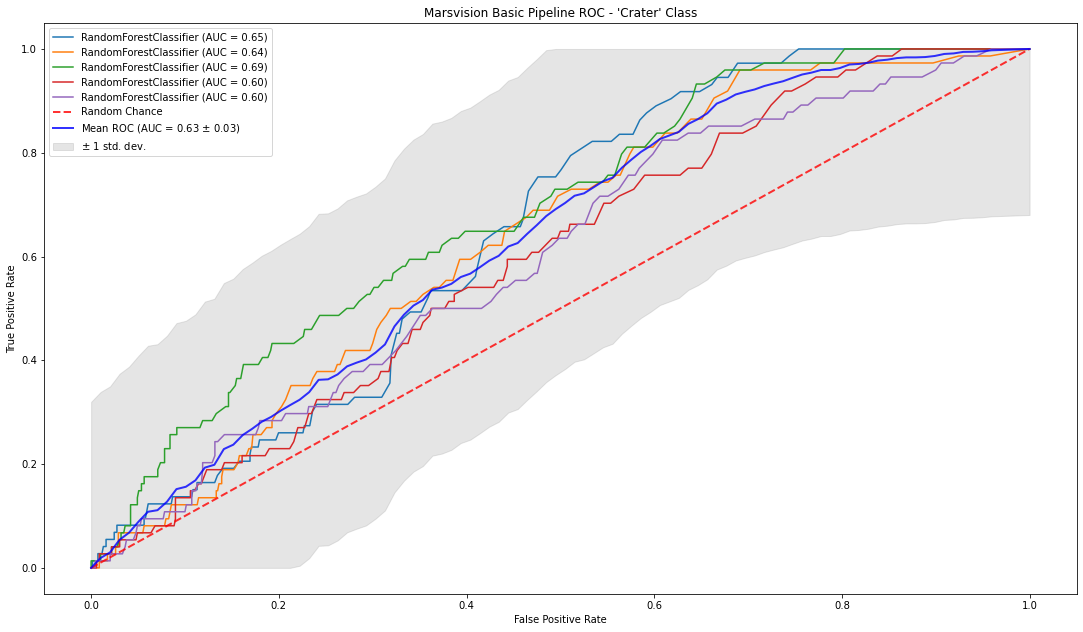

In [57]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 1 else 0)
crater_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Crater' Class")

In [58]:
crater_cv_results

{'precisions': [0.21428571428571427, 0.0, 0.14285714285714285, 0.0, 0.0],
 'recalls': [0.0410958904109589, 0.0, 0.013513513513513514, 0.0, 0.0],
 'roc_aucs': [0.6477410146105506,
  0.6383372502937721,
  0.6869663141402271,
  0.5994614179396788,
  0.6004896200548374],
 'mean_auc': 0.6345991234078132,
 'std_auc': 0.03264083983832881,
 'accuracies': [0.893979057591623,
  0.8952879581151832,
  0.8965968586387435,
  0.8979057591623036,
  0.900523560209424],
 'acc_mean': 0.8968586387434556,
 'acc_std': 0.002251917609173454,
 'tprs': [array([0.        , 0.02739726, 0.05479452, 0.08219178, 0.08219178,
         0.08219178, 0.12162723, 0.12328767, 0.12328767, 0.1369863 ,
         0.1369863 , 0.15068493, 0.16438356, 0.16438356, 0.19178082,
         0.19178082, 0.20547945, 0.23287671, 0.24657534, 0.24657534,
         0.26027397, 0.26027397, 0.26027397, 0.2739726 , 0.31506849,
         0.31506849, 0.31506849, 0.31506849, 0.32876712, 0.32876712,
         0.32876712, 0.33960611, 0.43513906, 0.4824961

## Cross Validation Results - Per-Class Binary Classification
### "Dark Dune" Class

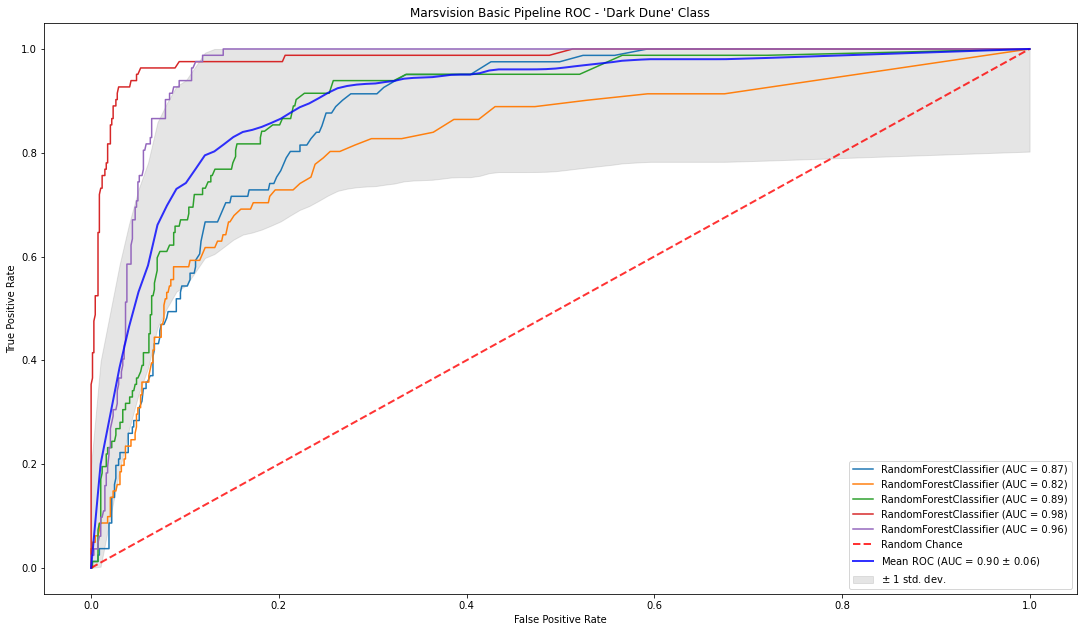

In [59]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 2 else 0)
dark_dune_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Dark Dune' Class")

In [61]:
dark_dune_cv_results

{'precisions': [0.3157894736842105,
  0.3684210526315789,
  0.5098039215686274,
  0.90625,
  0.6262626262626263],
 'recalls': [0.07407407407407407,
  0.08641975308641975,
  0.3170731707317073,
  0.7073170731707317,
  0.7560975609756098],
 'roc_aucs': [0.8738228223342913,
  0.8173182943802759,
  0.892935054717116,
  0.9825209212502682,
  0.9583184321579287],
 'mean_auc': 0.904983104967976,
 'std_auc': 0.05942727963540229,
 'accuracies': [0.8848167539267016,
  0.887434554973822,
  0.893979057591623,
  0.9607329842931938,
  0.925392670157068],
 'acc_mean': 0.9104712041884817,
 'acc_std': 0.029016290633338448,
 'tprs': [array([0.        , 0.03703704, 0.08641975, 0.20987654, 0.25925926,
         0.28395062, 0.36045642, 0.43209877, 0.48385085, 0.51851852,
         0.54320988, 0.57887517, 0.66404789, 0.66666667, 0.69497444,
         0.71604938, 0.71604938, 0.72839506, 0.72839506, 0.74074074,
         0.76534896, 0.80197032, 0.80246914, 0.82171509, 0.83950617,
         0.87654321, 0.89228083, 

## Cross Validation Results - Per-Class Binary Classification
### "Streak" Class

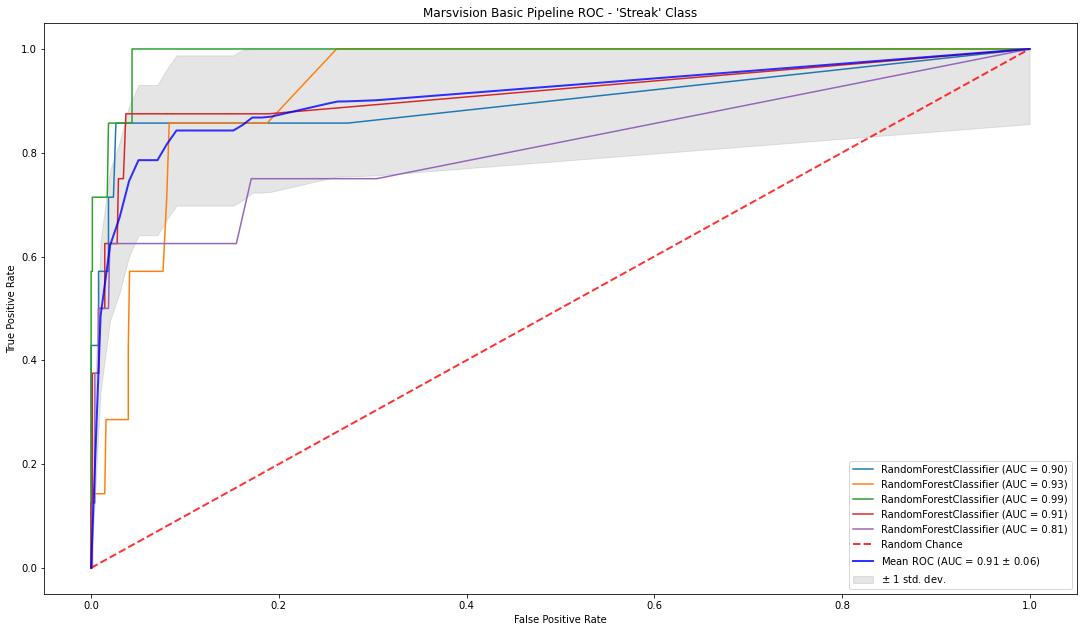

In [62]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 3 else 0)
streak_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Streak' Class")

In [63]:
streak_cv_results

{'precisions': [1.0, 0.5, 1.0, 0.5, 0.3333333333333333],
 'recalls': [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.125,
  0.125],
 'roc_aucs': [0.9016795621815437,
  0.9312134364974523,
  0.991036044536705,
  0.9145171957671958,
  0.8120866402116402],
 'mean_auc': 0.9101065758389074,
 'std_auc': 0.05778140596813795,
 'accuracies': [0.9921465968586387,
  0.9908376963350786,
  0.9921465968586387,
  0.9895287958115183,
  0.9882198952879581],
 'acc_mean': 0.9905759162303666,
 'acc_std': 0.0015264271976034862,
 'tprs': [array([0.        , 0.57142857, 0.71428571, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85898728, 0.86097337,
         0.86295946, 0.86494556, 0.866931

## Cross Validation Results - Per-Class Binary Classification
### "Bright Dune" Class

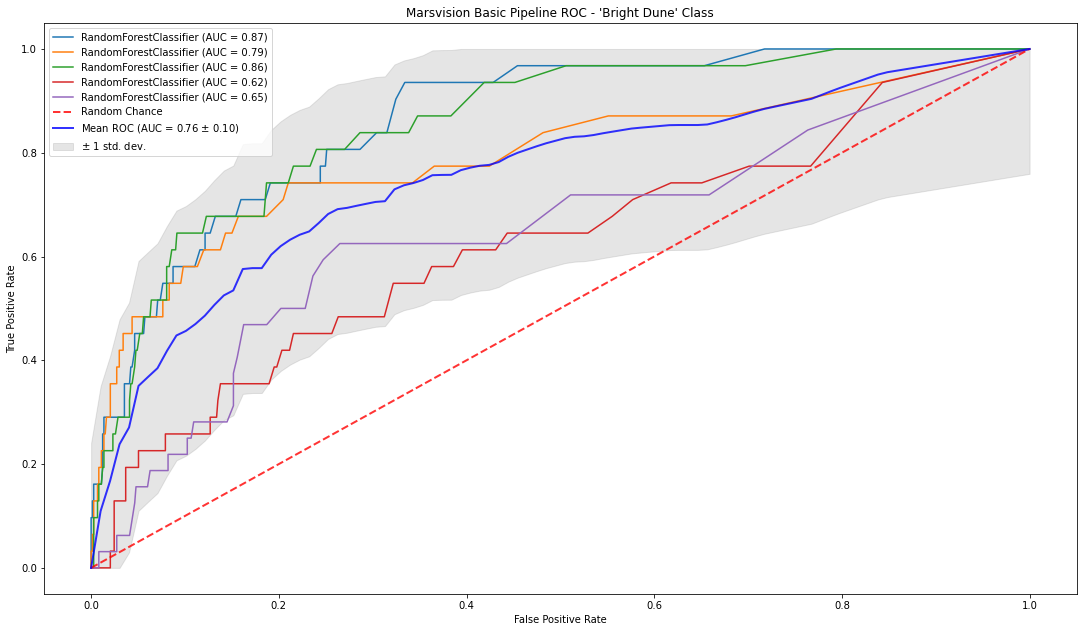

In [47]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 4 else 0)
bright_dune_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Bright Dune' Class")

In [51]:
bright_dune_cv_results

{'precisions': [1.0, 1.0, 0.0, 0.0, 0.0],
 'recalls': [0.03225806451612903, 0.03225806451612903, 0.0, 0.0, 0.0],
 'roc_aucs': [0.8663688773489416,
  0.7919728909034899,
  0.8590855080755182,
  0.6247634555296396,
  0.6472421448087432],
 'mean_auc': 0.7578865753332664,
 'std_auc': 0.10308779343869054,
 'accuracies': [0.9607329842931938,
  0.9607329842931938,
  0.9568062827225131,
  0.9424083769633508,
  0.9541884816753927],
 'acc_mean': 0.954973821989529,
 'acc_std': 0.006755752827520404,
 'tprs': [array([0.        , 0.16129032, 0.29032258, 0.29032258, 0.35483871,
         0.4516129 , 0.48387097, 0.51058977, 0.5483871 , 0.58064516,
         0.58064516, 0.58422939, 0.61290323, 0.67139133, 0.67741935,
         0.67741935, 0.70967742, 0.70967742, 0.70967742, 0.74193548,
         0.74193548, 0.74193548, 0.74193548, 0.74193548, 0.74193548,
         0.80645161, 0.80645161, 0.80645161, 0.80645161, 0.81815675,
         0.83652906, 0.83870968, 0.89335754, 0.93241167, 0.93548387,
         0.93548

## Cross Validation Results - Per-Class Binary Classification
### "Edge" Class

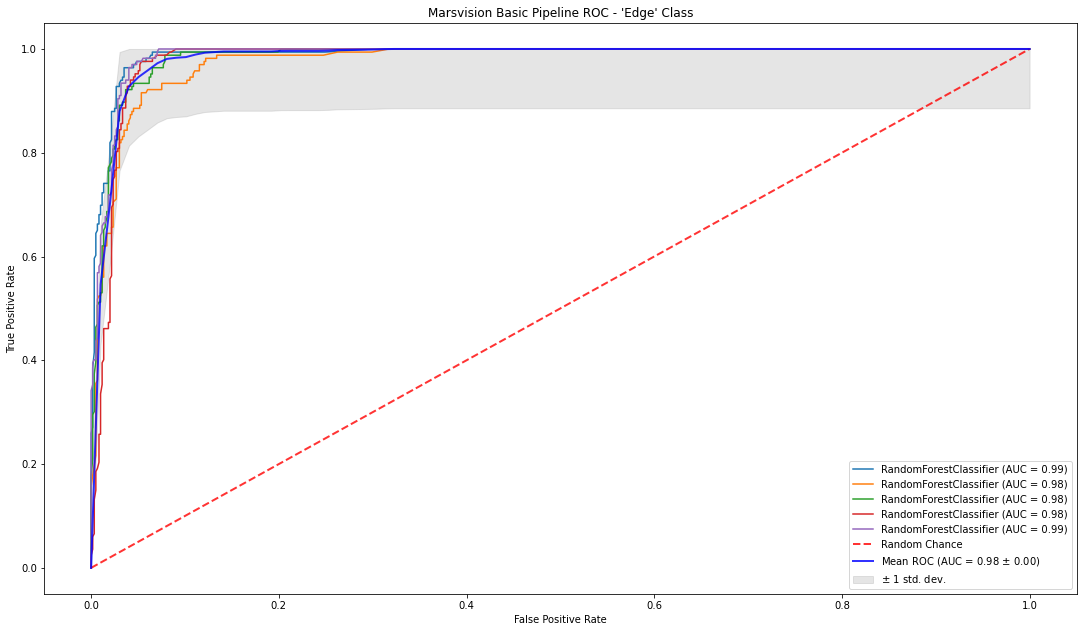

In [33]:
model.training_labels = df_labelled["class_code"].apply(lambda label: 
                                                    1 if label == 6 else 0)
edge_cv_results = model.cross_validate_plot("Marsvision Basic Pipeline ROC - 'Edge' Class")

In [36]:
edge_cv_results

{'precisions': [0.8863636363636364,
  0.8260869565217391,
  0.8547486033519553,
  0.8888888888888888,
  0.8895348837209303],
 'recalls': [0.9397590361445783,
  0.9156626506024096,
  0.9216867469879518,
  0.7664670658682635,
  0.9161676646706587],
 'roc_aucs': [0.9892563565297982,
  0.9767699560784946,
  0.984672804932103,
  0.9806467467075898,
  0.9880389973821201],
 'mean_auc': 0.9838769723260212,
 'std_auc': 0.004644084710788998,
 'accuracies': [0.9607329842931938,
  0.9397905759162304,
  0.9489528795811518,
  0.9280104712041884,
  0.9568062827225131],
 'acc_mean': 0.9468586387434555,
 'acc_std': 0.011841029191516923,
 'tprs': [array([0.        , 0.69879518, 0.8197639 , 0.93446513, 0.96385542,
         0.97590361, 0.98192771, 0.9939759 , 0.9939759 , 0.9939759 ,
         0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 ,
         0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 ,
         0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 , 0.9939759 ,
         0.99437954

## Note on the "Impact Class":
There are no samples with this class (impact, class code = 5). Therefore, we cannot train and test for this class.

# Comparing Cross Validation Results Per-Class

These are scores for a Random Forest classifier on each class treated as a binary prediction.

In [94]:
results_df = pd.DataFrame(data={
    "class_name": ["Other", "Crater", "Streak", "Dark Dune", "Bright Dune", "Edge"],
    "mean_precision": [
        np.mean(other_cv_results["precisions"]),
        np.mean(crater_cv_results["precisions"]),
        np.mean(streak_cv_results["precisions"]),
        np.mean(dark_dune_cv_results["precisions"]),
        np.mean(bright_dune_cv_results["precisions"]),
        np.mean(edge_cv_results["precisions"])
    ],
    "mean_recall": [
        np.mean(other_cv_results["recalls"]),
        np.mean(crater_cv_results["recalls"]),
        np.mean(streak_cv_results["recalls"]),
        np.mean(dark_dune_cv_results["recalls"]),
        np.mean(bright_dune_cv_results["recalls"]),
        np.mean(edge_cv_results["recalls"])
    ],
    "mean_auc": [
        other_cv_results["mean_auc"],
        crater_cv_results["mean_auc"],
        streak_cv_results["mean_auc"],
        dark_dune_cv_results["mean_auc"],
        bright_dune_cv_results["mean_auc"],
        edge_cv_results["mean_auc"]
    ],
    "mean_acc": [
        other_cv_results["acc_mean"],
        crater_cv_results["acc_mean"],
        streak_cv_results["acc_mean"],
        dark_dune_cv_results["acc_mean"],
        bright_dune_cv_results["acc_mean"],
        edge_cv_results["acc_mean"]]
})

